# 14. Longest Common Prefix

Write a function to find the longest common prefix string amongst an array of strings.

If there is no common prefix, return an empty string "".

=> strings 들 사이에서 가장 긴 공통 prefix를 찾는 문제

LCP : 두 접미사의 최대 공통 접두사의 길이


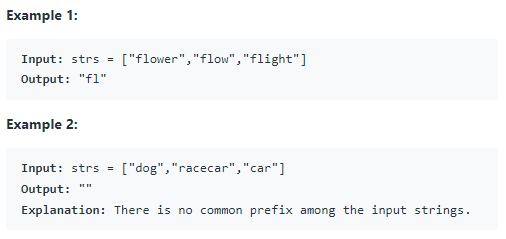

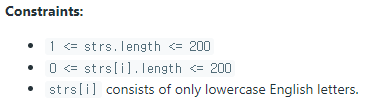

## Solutions

< brute force >

In [ ]:
class Solution:
    def longestCommonPrefix(self, strs: List[str]) -> str:
        if not strs:
            return ""

        shortStr = min(strs, key = len) #가장 짧은 문자열 뽑기

        for ind, char in enumerate(shortStr):
            for others in strs:
                if others[ind] != char:
                    return shortStr[:ind]

        return shortStr

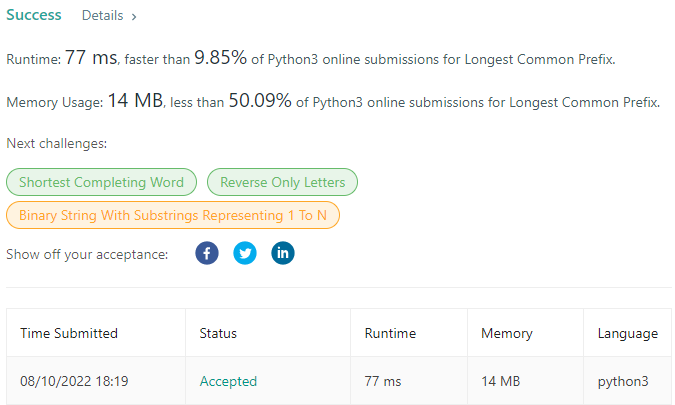



---



< 완전 탐색 - vertical >

In [ ]:
class Solution:
    def longestCommonPrefix(self, strs: List[str]) -> str:
        if not strs:
            return ""
        for i in range(len(strs[0])):
            for j in range(1, len(strs)):
                if i == len(strs[j]) or strs[j][i] != strs[0][i]:
                    return strs[0][:i]
        return strs[0]

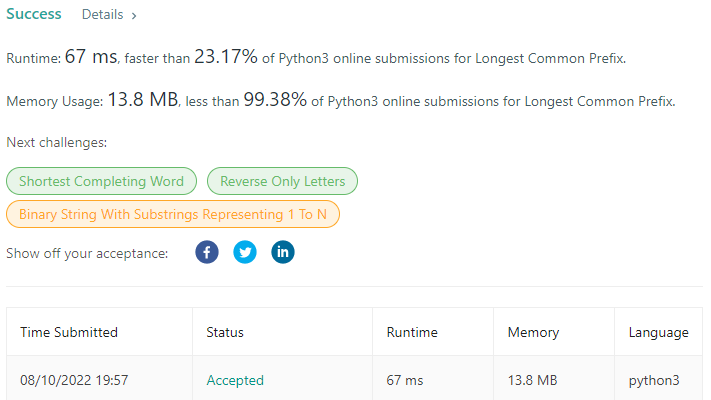



---



[분할정복법(Divide and Conquer)]

> 문제를 즉각 해결할 수 있을 때까지 재귀적으로 둘 이상의 하위 문제(Sub-problem)들로 나누고(Divide) 문제를 해결한 다음(Conquer) 그 결과를 이용해 다시 전체 문제를 해결하며 합치는 방법

=> 해를 구할 수 있을 만큼 충분히 더 작은 사례로 나누어 해결하는 방법

[분할정복의 핵심 진행방식]

① 분할(Divide) : 문제 사례를 분할하여 비슷한 유형의 더 작은 하위 문제로 분할이 가능할 때 까지 나눈다.

② 정복(Conquer) : 각 하위 문제를 재귀적으로 해결한다. 하위 문제의 규모가 나눌 수 없는 단위가 되면 탈출 조건을 설정하고 해결한다.

③ 병합(Combine) : 필요하다면, 작은 사례에 대한 해답을 통합하여 원래 사례의 해답을 구한다.

=> Divide를 제대로 나누면 Conquer과정은 자동으로 쉬워진다. 그래서 Divide를 잘 설계하는 것이 중요!

분할정복 알고리즘은 재귀 알고리즘이 많이 사용되는데, 이 부분에서 분할정복 알고리즘의 효율성을 깎아내릴 수 있다.
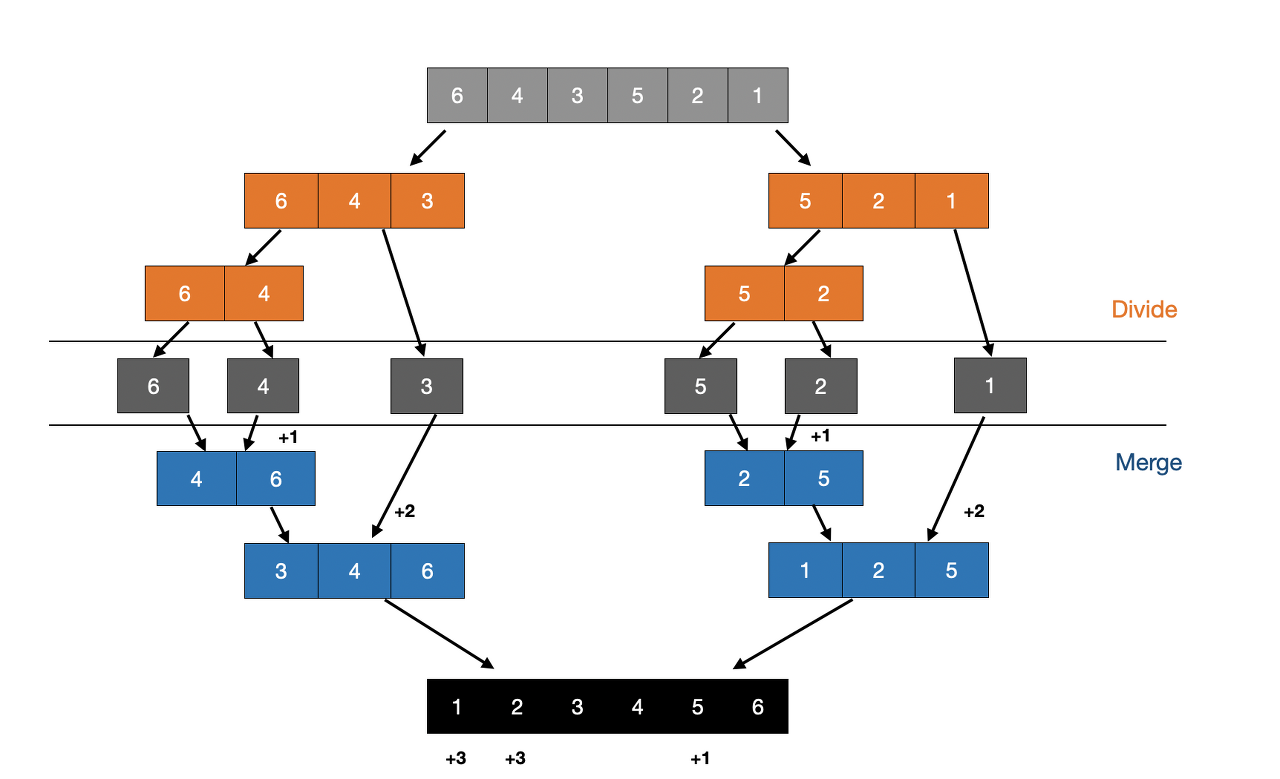

분할정복 알고리즘은 최소한 두 개의 하위 문제를 생성하므로 재귀 호출을 여러번 실행한다.


[분할정복법의 예시]

이분검색, 합병정렬, 퀵정렬, 최대값 찾기, 임계값의 결정, 쉬트라센 행렬곱셈 알고리즘 등

<합병 정렬>

> 하나의 리스트를 두 개의 균등한 크기로 분할하고 분할된 부분 리스트를 정렬한 다음, 두 개의 정렬된 부분 리스트를 합하여 전체가 정렬된 리스트가 되게 하는 방법

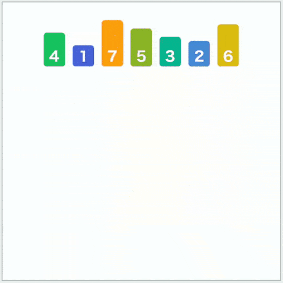

① 분할 : 전체 데이터를 반으로 지속적으로 분할한다. 직접 문제가 해결되는 수준까지(1개 남을 때까지)

② 정복 : 데이터가 1개가 남으면 그 자체로 이미 정렬된 상태이다. 분할된 2개의 데이터를 정렬한다.(하위 문제 해결)

③ 병합 : 정렬된 하위 문제를 병합하여 전체 내역을 정렬한다.

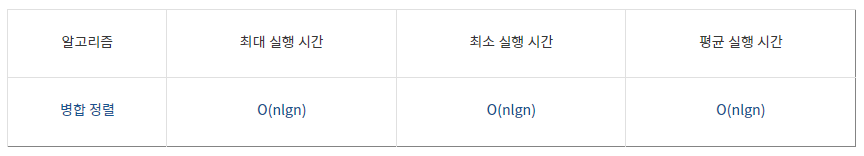


<퀵 정렬>

> 특정 원소 피봇(pivot)을 기준으로 주어진 배열을 두 부분 배열로 분할하고 각 부분 배열에 대해 퀵 정렬을 순환적으로 적용하는 방식

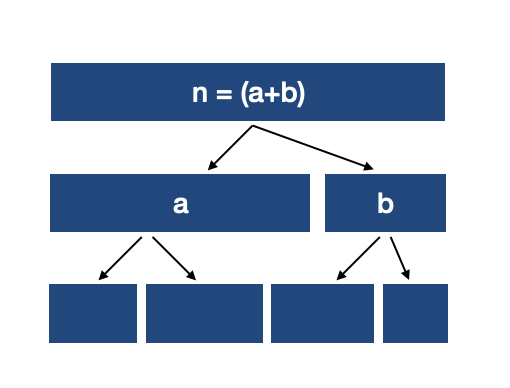

① 분할 : 피봇 하나를 선택하여 피봇을 기준으로 2개의 부분 배열로 분할한다.

② 정복 : 피봇을 기준으로 피봇보다 큰 값, 혹은 작은 값을 찾는다. 왼쪽에서 부터 피봇보다 큰 값을 찾고 오른쪽에서 부터는 피봇보다 작은 값을 찾아서 두 원소를 교환한다. 분할된 부분 배열의 크기가 0이나 1일 될때까지 반복한다.

③ 병합 : conquer과정에서 값의 위치가 바뀌므로 따로 결합은 하지 않는다.

퀵 정렬의 경우 피봇의 위치나 배열의 상태에 따라 최악의 경우 O(n^2)이 나올 수도 있다. 

예로, [1 2 3 4 5 6 7 8 9 10]와 같은 이미 정렬된 배열을 오름차순으로 퀵정렬을 하면 N개의 원소를 N번 순회하므로 N^2이라는 시간이 걸리게 된다. 그래서 무작정 분할정복 알고리즘인 합병,퀵 정렬을 사용하기보다는 그 문제의 특성을 찾고 그에 맞는 적절한 정렬 알고리즘을 선택하는 것이 중요하다.

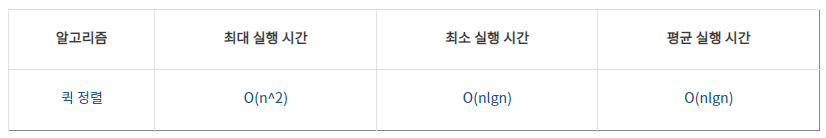

<이진 탐색>

> 정렬된 데이터를 효과적으로 탐색할 수 있는 방법. (정렬된 데이터만 사용 가능; 참고로 정렬되지 않은 데이터 탐색은 파라메트릭 서치로 가능)

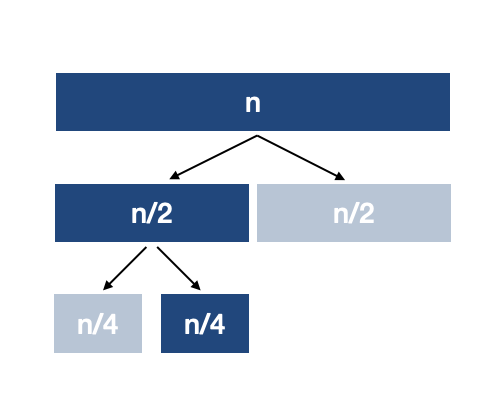

① 분할 : 배열의 가운데 원소를 기준으로 왼쪽, 오른쪽 부분배열로 분할한다. 탐색키와 가운데 원소가 같으면 분할을 종료한다.

② 정복 : 탐색키가 가운데 원소보다 작으면 왼쪽 부분배열을 대상으로 이진 탐색을 순환 호출하고, 크면 오른쪽 부분배열을 대상으로 이진 탐색을 호출한다.

③ 병합 : 탐색 결과가 직접 반환되므로 결합이 불필요하다.

이진탐색의 탐색 대상은 정렬이 되어 있어야하고 탐색대상 정렬 크기가 매 회 절반으로 줄어드므로, 시간 복잡도는 O(logn)을 가진다.

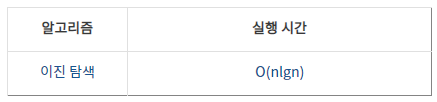

[분할정복법의 장단점]

- 분할된 작은 문제는 원래 문제와 성격이 동일 -> 입력 크기만 작아짐

- 분할된 문제는 서로 독립적이다(중복 제거 X) -> 순환적 분할  및 결과 결합 가능 

분할정복은 Top-down방식으로 재귀 호출의 장단점과 똑같다고 보면 된다.

장점

- 문제를 나누어 해결
  - 어려운 문제를 해결할 수 있다
  - 병렬적으로 문제를 해결할 수 있다.
- Top-down 재귀방식으로 구현
  - 코드가 직관적

단점

- 함수를 재귀적으로 호출
  - 함수 호출로 인한 오버헤드가 발생
- 스택에 다양한 데이터를 보관
  - 스택 오버플로우가 발생하거나 과도한 메모리 사용을 하게 되는 단점

< divide and conquer >

In [ ]:
class Solution:
    def longestCommonPrefix(self, strs: List[str]) -> str:
        def commonPrefix(lcpL, lcpR):
            minLen = min(len(lcpL), len(lcpR))

            for i in range(minLen):
                if lcpL[i] != lcpR[i]:
                    return lcpL[:i]
            return lcpL[:minLen]

        def findLongestCommonPrefix(strs, leftIndex, rightIndex):
            if leftIndex == rightIndex:
                return strs[leftIndex]
            else:
                midIndex = (leftIndex + rightIndex) // 2
                lcpL = findLongestCommonPrefix(strs, leftIndex, midIndex)
                lcpR = findLongestCommonPrefix(strs, midIndex + 1, rightIndex)
                return commonPrefix(lcpL, lcpR)

        if not strs:
            return ""

        return findLongestCommonPrefix(strs, 0, len(strs) - 1)

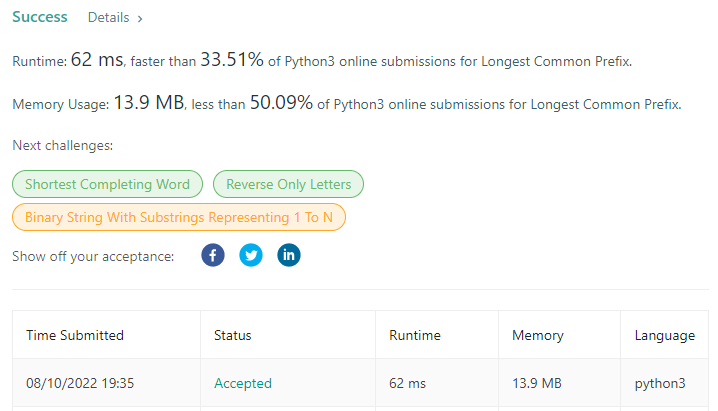

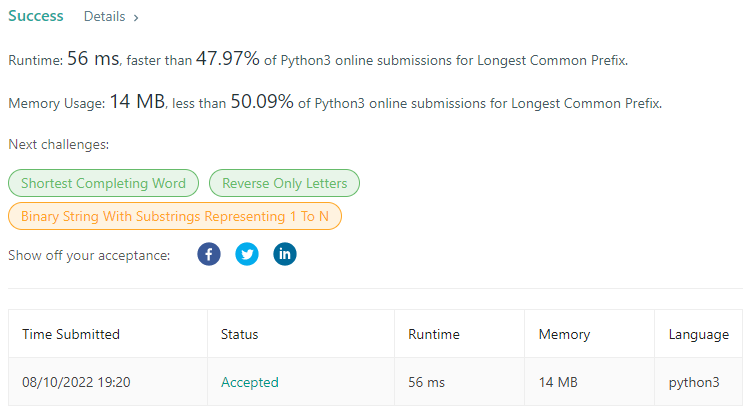